1. Import the necessary packages
2. Read the 3 datasets into dataframes
3. Apply info

In [13]:
import pandas as pd

df1 = pd.read_csv('viewer_feedback.csv')
df2 = pd.read_csv('film_catalog.csv')
df3 = pd.read_csv('subscriber_profiles.csv')

print(df1.info)
print(df2.info)
print(df3.info)

<bound method DataFrame.info of        viewer_id  film_id  rating_score  feedback_timestamp
0            196      242             3           881250949
1            186      302             3           891717742
2             22      377             1           878887116
3            244       51             2           880606923
4            166      346             1           886397596
...          ...      ...           ...                 ...
99995        880      476             3           880175444
99996        716      204             5           879795543
99997        276     1090             1           874795795
99998         13      225             2           882399156
99999         12      203             3           879959583

[100000 rows x 4 columns]>
<bound method DataFrame.info of       film_id                           film_title premier_date  unknown  \
0           1                           Toy Story     01-Jan-95        0   
1           2                       

3. Apply shape and description

In [14]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

print(df1.describe)
print(df2.describe)
print(df3.describe)

(100000, 4)
(1681, 22)
(943, 5)
<bound method NDFrame.describe of        viewer_id  film_id  rating_score  feedback_timestamp
0            196      242             3           881250949
1            186      302             3           891717742
2             22      377             1           878887116
3            244       51             2           880606923
4            166      346             1           886397596
...          ...      ...           ...                 ...
99995        880      476             3           880175444
99996        716      204             5           879795543
99997        276     1090             1           874795795
99998         13      225             2           882399156
99999         12      203             3           879959583

[100000 rows x 4 columns]>
<bound method NDFrame.describe of       film_id                           film_title premier_date  unknown  \
0           1                           Toy Story     01-Jan-95        0   


3. Find number of missing values in the data

In [16]:
df1.isnull().sum
df2.isnull().sum
df3.isnull().sum

<bound method DataFrame.sum of      viewer_id  viewer_age  viewer_gender  viewer_profession  \
0        False       False          False              False   
1        False       False          False              False   
2        False       False          False              False   
3        False       False          False              False   
4        False       False          False              False   
..         ...         ...            ...                ...   
938      False       False          False              False   
939      False       False          False              False   
940      False       False          False              False   
941      False       False          False              False   
942      False       False          False              False   

     subscriber_region_code  
0                     False  
1                     False  
2                     False  
3                     False  
4                     False  
..                  

4. Find the number of movies per genre using the item data
5. Drop the movie where the genre is unknown

In [27]:
movies_genre = df2.columns[3:]
genre_count = df2[movies_genre].sum()
print(genre_count)

df_cleaned = df2[df2['unknown'] != 1]
print(df_cleaned)

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64
      film_id                           film_title premier_date  unknown  \
0           1                           Toy Story     01-Jan-95        0   
1           2                           GoldenEye     01-Jan-95        0   
2           3                          Four Rooms     01-Jan-95        0   
3           4                          Get Shorty     01-Jan-95        0   
4           5                             Copycat     01-Jan-95        0   
...       ...                                  ...          ...      ...   
1676     1678                          Mat' i syn     06-Feb-98        0   
1677     1679     

6. Find the movies that have more than one genre

In [28]:
# List genre columns, excluding 'unknown'
movies_genre = [col for col in df2.columns[3:] if col != 'unknown']

# Count how many genres each movie has
df_cleaned['genre_count'] = df_cleaned[movies_genre].sum(axis=1)

# Filter movies with more than one genre
multi_genre_movies = df_cleaned[df_cleaned['genre_count'] > 1]

# Show the result
print(multi_genre_movies[['film_title', 'genre_count'] + movies_genre])

              film_title  genre_count  Action  Adventure  Animation  \
0             Toy Story             3       0          0          1   
1             GoldenEye             3       1          1          0   
3            Get Shorty             3       1          0          0   
4               Copycat             3       0          0          0   
6        Twelve Monkeys             2       0          0          0   
...                  ...          ...     ...        ...        ...   
1667  MURDER and murder             3       0          0          0   
1668            Tainted             2       0          0          0   
1671             Mirage             2       1          0          0   
1677          B. Monkey             2       0          0          0   
1678      Sliding Doors             2       0          0          0   

      Childrens  Comedy  Crime  Documentary  Drama  Fantasy  Film-Noir  \
0             1       1      0            0      0        0          0   

/tmp/ipykernel_6298/3141006155.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['genre_count'] = df_cleaned[movies_genre].sum(axis=1)


7. Univariate plots of columns: 'rating_score', 'viewer_ge', 'premier_year','viewe_gender' and 'viewer_profession'

/tmp/ipykernel_6298/1029725489.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  films_df['premier_year'] = pd.to_datetime(films_df['premier_date'], errors='coerce').dt.year


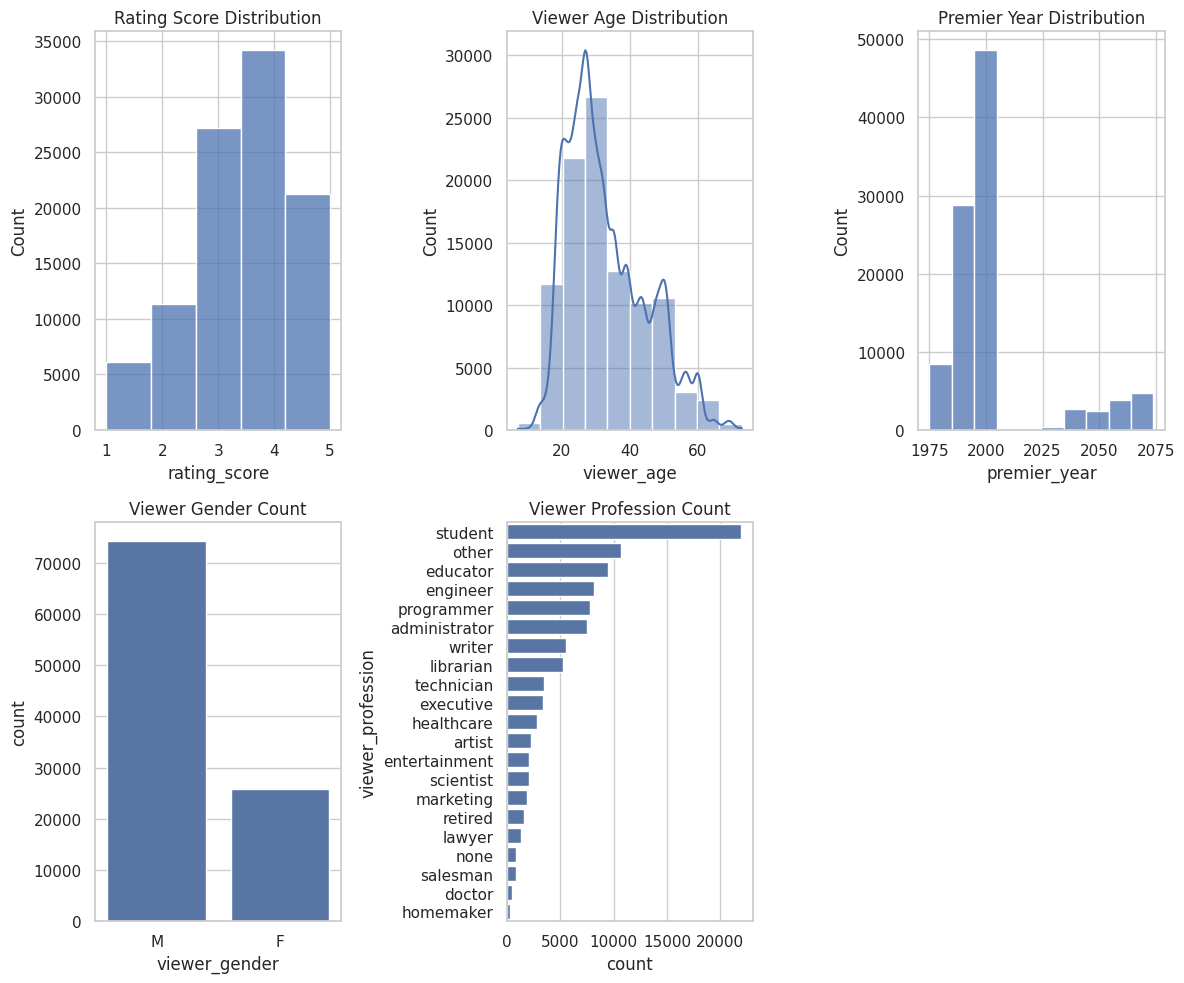

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample file names or dataframes
# ratings.csv: viewer_id, film_id, rating_score, feedback_timestamp
# viewers.csv: viewer_id, viewer_age, viewer_gender, viewer_profession, subscriber_region_code
# films.csv: film_id, film_title, premier_date, ...

# Read datasets
ratings_df = pd.read_csv('viewer_feedback.csv')
viewers_df = pd.read_csv('subscriber_profiles.csv')
films_df = pd.read_csv('film_catalog.csv')

# Convert 'premier_date' to year
films_df['premier_year'] = pd.to_datetime(films_df['premier_date'], errors='coerce').dt.year

# Merge datasets
merged_df = ratings_df.merge(viewers_df, on='viewer_id').merge(films_df[['film_id', 'premier_year']], on='film_id')

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))

# Plot 1: Rating Score Distribution
plt.subplot(2, 3, 1)
sns.histplot(merged_df['rating_score'], bins=5, kde=False)
plt.title('Rating Score Distribution')

# Plot 2: Viewer Age Distribution
plt.subplot(2, 3, 2)
sns.histplot(merged_df['viewer_age'], bins=10, kde=True)
plt.title('Viewer Age Distribution')

# Plot 3: Premier Year Distribution
plt.subplot(2, 3, 3)
sns.histplot(merged_df['premier_year'].dropna(), bins=10, kde=False)
plt.title('Premier Year Distribution')

# Plot 4: Viewer Gender Counts
plt.subplot(2, 3, 4)
sns.countplot(x='viewer_gender', data=merged_df)
plt.title('Viewer Gender Count')

# Plot 5: Viewer Profession Counts
plt.subplot(2, 3, 5)
sns.countplot(y='viewer_profession', data=merged_df, order=merged_df['viewer_profession'].value_counts().index)
plt.title('Viewer Profession Count')

plt.tight_layout()
plt.show()
